In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [42]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import random

In [25]:
#DATA_PATH = '/Users/megantabbutt/BRT_data/GeoData/'
#DATA_PATH_Dems = '/Users/megantabbutt/BRT_data/DemographicData/'
RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
CitiesShapeFile = "Shapes/City/City_Limit.shp"
LakesShapeFile = "Shapes/Lakes/Lakes_and_Rivers.shp"
StreetsShapeFile = "Shapes/Street/Street_Centerlines_and_Pavement_Data.shp"


cityShapes_df = geopandas.read_file(CitiesShapeFile)
lakeShapes_df = geopandas.read_file(LakesShapeFile)
streetShapes_df = geopandas.read_file(StreetsShapeFile)

In [39]:
routesShapes_df = geopandas.read_file(RoutesShapeFile)
routesShapes_df.info()
routesShapes_df.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     int64   
 1   trips_rout  47 non-null     int64   
 2   route_shor  47 non-null     int64   
 3   route_url   47 non-null     object  
 4   ShapeSTLen  47 non-null     float64 
 5   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 2.3+ KB


,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733..."
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039..."
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939..."


In [72]:
colors = [.01*random.randint(0, 70)for i in range(len(routesShapes_df['OBJECTID']))]
routesShapes_df['colors'] = colors
routesShapes_df.head(3)

,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry,colors
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733...",0.34
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039...",0.28
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939...",0.16


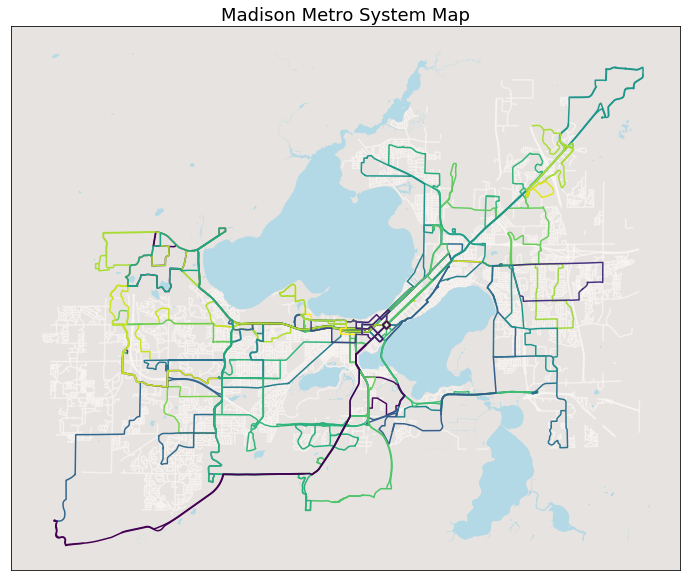

In [75]:
ax = cityShapes_df.plot(color='#e7e3e0', figsize=(12, 12))
lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.7, ax=ax)

routesShapes_df.plot(ax=ax, column='colors', cmap='viridis')

plt.xticks([])
plt.yticks([])

ax.set_facecolor("#e7e3e0")
plt.title("Madison Metro System Map", fontsize=18)
plt.savefig('PaperFigures/SystemMap', bbox_inches='tight')
plt.show()